In [1]:
def scale_feature(feature):
  max = float('-inf')
  min = float('inf')
  # first loop find out the max and the min value of feature array
  for i in range(len(feature)):
    if feature[i] > max:
      max = feature[i]
    if feature[i] < min:
      min = feature[i]
  # second loop scale each element of the feature
  for i in range(len(feature)):
    feature[i] = (feature[i] - min)/(max - min)
  return feature

def dist_euclidean(v1, v2):
  d = 0
  for i in range(len(v1)):
    #v1[i] = float(v1[i])
    #v1[j] = float(v1[j])
    #print(v1[i])
    #print(v2[i])
    d += ((v1[i]-v2[i]) * (v1[i]-v2[i]))
  return d

def find_min(vec):
  min = 999999
  min_ind = -1
  for i in range(len(vec)):
    if vec[i] < min:
      min = vec[i]
      min_ind = i
  return min, min_ind

In [ ]:
print(find_min([1,3,5]))

(1, 0)


In [2]:
  #step 1:Read the input file and build a data matrix such that the feature values are scaled in the interval [0, 1]
  
  #Data file name
  data_file_name = "/content/drive/MyDrive/CSC373_DMP_Liu_Tongtong(Frank)/DMP_Classification/DecTreeAssign1.dat"
  data_matrix = []
  # read the file
  with open(data_file_name, 'r') as data_file_ptr:
    for index, item in enumerate(data_file_ptr):
      item_list = item.split(',')
      if index != 0:  #first row of the data is the title
        data_matrix.append(item_list) #this is the data matrix
      else:
        feature_name = item_list
      
  #get rid of the new line character in last feature name
  feature_name[len(feature_name)-1] = "F{}".format(len(feature_name)-2)

  #normalize each column of the matrix
  for i in range(1, len(data_matrix[0])): # loop for each column/feature
    feature_vector = [data_matrix[j][i] for j in range(len(data_matrix))]
    for k in range(len(feature_vector)):
      feature_vector[k] = float(feature_vector[k]) #covert to float
    feature_vector = scale_feature(feature_vector)
    for m in range(len(data_matrix)):
      data_matrix[m][i] = feature_vector[m]
      # print(data_matrix[m])



In [6]:

#print(data_matrix)
num_matrix = []
for data in data_matrix:
  #print(data)
  #print(data[1:])
  num_matrix.append(data[1:])


# proximity based anomaly detection
anomaly_score = []
k = 3
for i in range(len(num_matrix)):
  euc_dist = []
  for j in range(len(num_matrix)):
    if i != j:
      euc_dist.append(dist_euclidean(num_matrix[j], num_matrix[i]))
  
  euc_dist.sort()
  anomaly_score.append(euc_dist[k-1])
anomaly_index = []
for i in range(len(anomaly_score)):
  if anomaly_score[i] > 1.3:
    anomaly_index.append(i)
    print("index {} has anomaly score {:.2f}".format(i, anomaly_score[i]))
    #print(data_matrix[i][0])

index 122 has anomaly score 1.34
index 152 has anomaly score 1.95
index 212 has anomaly score 2.27
index 461 has anomaly score 1.71


In [ ]:
  #step 1:Read the input file and build a data matrix such that the feature values are scaled in the interval [0, 1]
  
  #Data file name
  data_file_name = "/content/drive/MyDrive/CSC373_DMP_Liu_Tongtong(Frank)/DMP_Anomaly_Detection (Final DMP)/insurance.csv"
  data_matrix = []
  # read the file
  with open(data_file_name, 'r') as data_file_ptr:
    for index, item in enumerate(data_file_ptr):
      item_list = item.split(',')
      if index != 0:  #first row of the data is the title
        data_matrix.append(item_list) #this is the data matrix
      else:
        feature_name = item_list

  #get rid of the new line character in last feature name
  #feature_name[len(feature_name)-1] = "F{}".format(len(feature_name)-2)
  print(feature_name)
  print(data_matrix[1085])
  for data in data_matrix:
    if data[1] == 'female':
      data[1] = 0
    else:
      data[1] = 1
    if data[4] == 'yes':
      data[4] = 1
    else:
      data[4] = 0
    if data[5] == 'southwest':
      data[5] = 0
    elif data[5] == 'southeast':
      data[5] = 1
    elif data[5] == 'northwest':
      data[5] = 2
    else:
      data[5] = 3
  #print(data_matrix)
  
  #normalize each column of the matrix
  for i in range(0, len(data_matrix[0])): # loop for each column/feature
    feature_vector = [data_matrix[j][i] for j in range(len(data_matrix))]
    for k in range(len(feature_vector)):
      feature_vector[k] = float(feature_vector[k]) #covert to float
    feature_vector = scale_feature(feature_vector)
    for m in range(len(data_matrix)):
      data_matrix[m][i] = feature_vector[m]
      # print(data_matrix[m])
  #print(data_matrix)
  print(data_matrix[1085])
  num_matrix = data_matrix
  # proximity based anomaly detection
  anomaly_score = []
  k = 3
  for i in range(len(num_matrix)):
    euc_dist = []
    for j in range(len(num_matrix)):
      if i != j:
        euc_dist.append(dist_euclidean(num_matrix[j], num_matrix[i]))
    
    euc_dist.sort()
    anomaly_score.append(euc_dist[k-1])
  """
  anomaly_score.sort(reverse=True)
  print(anomaly_score)
  """
  anomaly_index = []
  for i in range(len(anomaly_score)):
    if anomaly_score[i] > 0.17:
      anomaly_index.append(i)
      print("index {} has anomaly score {:.3f}".format(i, anomaly_score[i]))
      #print(data_matrix[i][0])
  

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges\n']
['39', 'female', '18.3', '5', 'yes', 'southwest', '19023.26\n']
[0.45652173913043476, 0.0, 0.06295399515738498, 1.0, 1.0, 0.0, 0.28574300483564663]
index 32 has anomaly score 0.173
index 92 has anomaly score 0.178
index 94 has anomaly score 0.191
index 103 has anomaly score 0.184
index 166 has anomaly score 0.202
index 240 has anomaly score 0.174
index 250 has anomaly score 0.207
index 251 has anomaly score 0.182
index 438 has anomaly score 0.190
index 640 has anomaly score 0.176
index 883 has anomaly score 0.191
index 937 has anomaly score 0.172
index 1012 has anomaly score 0.175
index 1085 has anomaly score 0.422
index 1300 has anomaly score 0.186


In [ ]:
print(anomaly_index)

[32, 92, 94, 103, 166, 240, 250, 251, 438, 640, 883, 937, 1012, 1085, 1300]


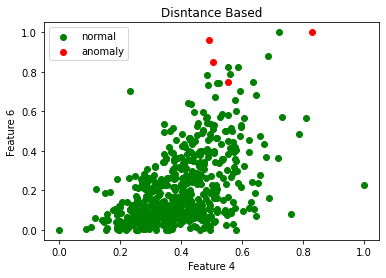

In [ ]:
import matplotlib.pyplot as plt
# only plot the first 3 dimension for 3D
from matplotlib import pyplot
import numpy as np
"""
color = ["r", "g"]
classes = ["anomaly", "normal"]
for i in range(len(num_matrix)):
  if i in anomaly_index:
    color_specific = "r"
    label_specific = "anomaly"
  else:
    color_specific = "g"
    label_specific = "normal"
  plt.scatter(num_matrix[i][2], num_matrix[i][3], c = color_specific, label = label_specific)
  #plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.xlabel("scaled BMI")
plt.ylabel("scaled Num_Children")
plt.title("scatter plot of BMI versus Children")

"""

normal_data = [num_matrix[i] for i in range(len(num_matrix)) if i not in anomaly_index]
anomaly_data = [num_matrix[i] for i in range(len(num_matrix)) if i in anomaly_index]
normal_data = np.array(normal_data)
anomaly_data = np.array(anomaly_data)
plt.scatter(normal_data[:,4], normal_data[:,6], c = 'g', label = 'normal')
plt.scatter(anomaly_data[:,4], anomaly_data[:,6], c = 'r', label = 'anomaly')
plt.xlabel("Feature 4")
plt.ylabel("Feature 6")
plt.title("Disntance Based")
plt.legend()


Text(0, 0.5, 'error rate of ensembled classifier')

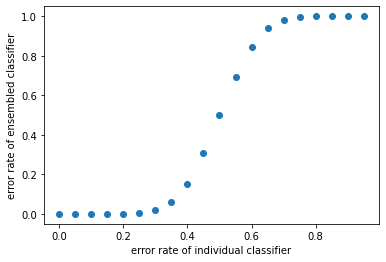

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def nCr(n,r):
    f = math.factorial
    return f(n) / f(r) / f(n-r)

# Exercise for Final  # 4
x = np.arange(0, 1, 0.05)
ans =  []
for num in x:
  y = 0
  for i in range(13,26):
    b = nCr(25,i)
    y += b * num**i * (1-num)**(25-i)
  
  ans.append(y)


plt.scatter(x, ans)
plt.xlabel("error rate of individual classifier")
plt.ylabel("error rate of ensembled classifier")



In [ ]:
def nCr(n,r):
    f = math.factorial
    return f(n) / f(r) / f(n-r)
print(nCr(10,3))

120.0
